In [1]:
### import libraries

# for DL modeling
import torch
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

# for number-crunching
import numpy as np
import scipy.stats as stats

# for dataset management
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

originalData = pd.read_csv(url,sep=';')
originalData

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [64]:
data = originalData.copy()

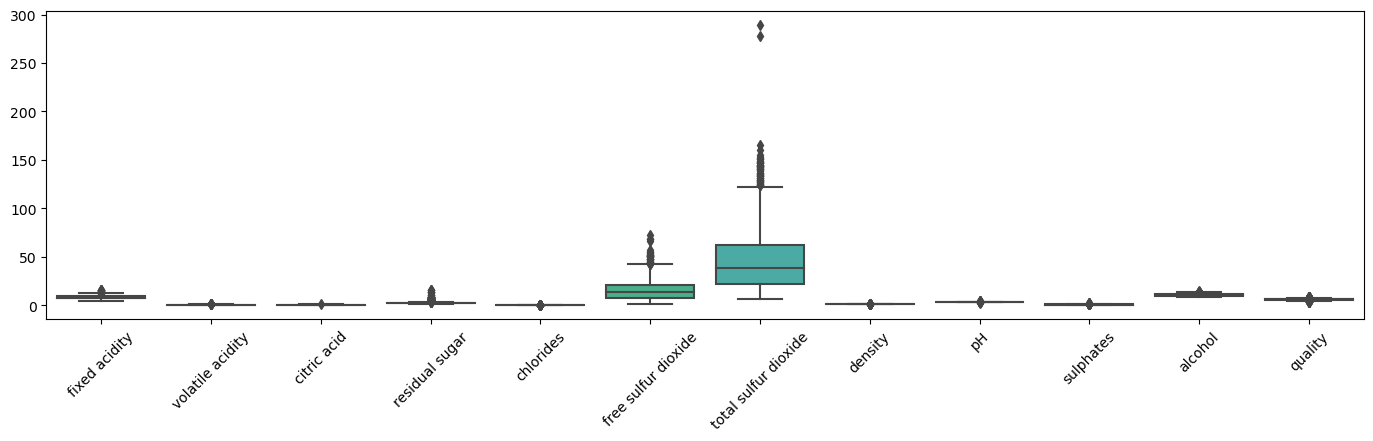

In [65]:
# plot some data
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [66]:
# removing outlier
data = data.drop(data[data['total sulfur dioxide']>200].index)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1597 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1597 non-null   float64
 1   volatile acidity      1597 non-null   float64
 2   citric acid           1597 non-null   float64
 3   residual sugar        1597 non-null   float64
 4   chlorides             1597 non-null   float64
 5   free sulfur dioxide   1597 non-null   float64
 6   total sulfur dioxide  1597 non-null   float64
 7   density               1597 non-null   float64
 8   pH                    1597 non-null   float64
 9   sulphates             1597 non-null   float64
 10  alcohol               1597 non-null   float64
 11  quality               1597 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.2 KB


In [68]:
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('residual sugar')

data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1597 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1597 non-null   float64
 1   volatile acidity      1597 non-null   float64
 2   citric acid           1597 non-null   float64
 3   residual sugar        1597 non-null   float64
 4   chlorides             1597 non-null   float64
 5   free sulfur dioxide   1597 non-null   float64
 6   total sulfur dioxide  1597 non-null   float64
 7   density               1597 non-null   float64
 8   pH                    1597 non-null   float64
 9   sulphates             1597 non-null   float64
 10  alcohol               1597 non-null   float64
 11  quality               1597 non-null   float64
dtypes: float64(12)
memory usage: 162.2 KB


In [70]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.597000e+03,1.597000e+03,1.597000e+03,1597.000000,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03
mean,3.559388e-17,1.245786e-16,1.779694e-17,2.531590,-1.423755e-16,8.898469e-18,-5.339081e-17,-8.361001e-14,3.025479e-16,8.898469e-17,-5.695020e-16,4.182280e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.395974,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.136087e+00,-2.280762e+00,-1.391823e+00,0.900000,-1.604575e+00,-1.422837e+00,-1.262581e+00,-3.546932e+00,-3.709380e+00,-1.937318e+00,-1.899221e+00,-3.266852e+00
25%,-7.006076e-01,-7.718255e-01,-9.286769e-01,1.900000,-3.721412e-01,-8.478700e-01,-7.596977e-01,-6.111392e-01,-6.587444e-01,-6.392206e-01,-8.653154e-01,-7.866225e-01
50%,-2.412541e-01,-4.530063e-02,-5.384522e-02,2.200000,-1.809014e-01,-1.770746e-01,-2.568145e-01,-6.216372e-04,-9.673073e-03,-2.261897e-01,-2.073755e-01,4.534922e-01
75%,5.051954e-01,6.253377e-01,7.695258e-01,2.600000,5.283609e-02,4.937208e-01,4.975104e-01,5.780428e-01,5.744912e-01,4.228588e-01,6.385471e-01,4.534922e-01
max,4.352281e+00,5.878672e+00,3.754246e+00,15.500000,1.112349e+01,5.380944e+00,3.734821e+00,3.683719e+00,4.533826e+00,7.916418e+00,4.210221e+00,2.933721e+00


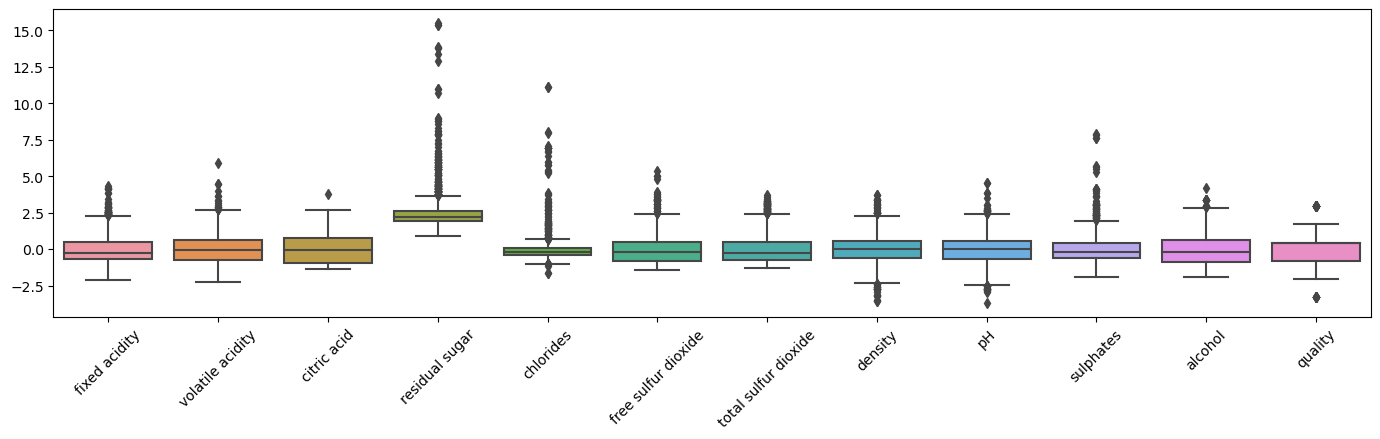

In [71]:
# plot some data
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1597 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1597 non-null   float64
 1   volatile acidity      1597 non-null   float64
 2   citric acid           1597 non-null   float64
 3   residual sugar        1597 non-null   float64
 4   chlorides             1597 non-null   float64
 5   free sulfur dioxide   1597 non-null   float64
 6   total sulfur dioxide  1597 non-null   float64
 7   density               1597 non-null   float64
 8   pH                    1597 non-null   float64
 9   sulphates             1597 non-null   float64
 10  alcohol               1597 non-null   float64
 11  quality               1597 non-null   float64
dtypes: float64(12)
memory usage: 162.2 KB


In [73]:
data.shape[0]

1597

In [74]:
# replacing 10 random residual sugar values to NaN
indexToReplace = np.random.choice(range(data.shape[0]), size=10, replace=False)
data['residual sugar'][indexToReplace] = np.nan

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1597 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1597 non-null   float64
 1   volatile acidity      1597 non-null   float64
 2   citric acid           1597 non-null   float64
 3   residual sugar        1587 non-null   float64
 4   chlorides             1597 non-null   float64
 5   free sulfur dioxide   1597 non-null   float64
 6   total sulfur dioxide  1597 non-null   float64
 7   density               1597 non-null   float64
 8   pH                    1597 non-null   float64
 9   sulphates             1597 non-null   float64
 10  alcohol               1597 non-null   float64
 11  quality               1597 non-null   float64
dtypes: float64(12)
memory usage: 226.7 KB


In [76]:
train_data = data.iloc[~data.index.isin(indexToReplace)]
train_labels = train_data['residual sugar'].values
train_labels = train_labels[:,None]
train_data = train_data.drop(columns=['residual sugar']).values
test_data = data.iloc[data.index.isin(indexToReplace)]
test_labels = test_data['residual sugar'].values
test_data = test_data.drop(columns=['residual sugar']).values
test_labels = test_labels[:,None]


In [77]:
print('Train Data:: ', train_data.shape)
print('Train Labels:: ', train_labels.shape)
print('Test Data:: ', test_data.shape)
print('Test Labels:: ', test_labels.shape)

Train Data::  (1587, 11)
Train Labels::  (1587, 1)
Test Data::  (10, 11)
Test Labels::  (10, 1)


In [78]:
train_dataT = torch.tensor(train_data).float()
train_labelsT = torch.tensor(train_labels).float()

test_dataT = torch.tensor(test_data).float()
# test_labelsT = TensorDataset(train_labels).float()

In [79]:
# split the data

train_data_S, test_data_S, train_labels_S, test_labels_S = train_test_split(train_dataT, train_labelsT, train_size=0.8)

train_DS = TensorDataset(train_data_S, train_labels_S)
test_DS = TensorDataset(test_data_S, test_labels_S)

train_loader = DataLoader(train_DS,batch_size=32,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_DS,batch_size=test_DS.tensors[0].shape[0])


In [80]:
for X, y in test_loader:
    print(X.shape,  y.shape)

torch.Size([318, 11]) torch.Size([318, 1])


In [81]:
def createModel():
    ANN = torch.nn.Sequential(
        torch.nn.Linear(11,64),
        torch.nn.ReLU(),
        torch.nn.Linear(64,64),
        torch.nn.ReLU(),
        torch.nn.Linear(64,1)
    )
    learningRate = 0.01

    lossFunction = torch.nn.MSELoss()

    optimizer = torch.optim.Adam(params=ANN.parameters(), lr=learningRate)

    return ANN, lossFunction, optimizer

In [82]:
ANN, lossFunction, optimizer  = createModel()
X, Y = next(iter(train_loader))
pred = ANN(X)
loss = lossFunction(pred, Y)
loss.item()

8.348984718322754

In [83]:
epochs = 1000

def trainModel(ANN, lossFunction, optimizer):

    trainLosses = torch.zeros(epochs)
    testLosses = torch.zeros(epochs)
    trainAcc = []
    testAcc = []

    for _ in range(epochs):
        batchAcc = []
        batchLoss = []
        for x, y in train_loader:
            yHat = ANN.forward(x)

            loss = lossFunction(yHat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchLoss.append(loss.item())
            # batchAcc.append(torch.mean((yHat == y).float())*100)

        # trainAcc.append(np.mean(batchAcc))
        trainLosses[_] = np.mean(batchLoss)

        X, Y = next(iter(test_loader))
        with torch.no_grad():
            pred = ANN(X)
        # testAcc.append(torch.mean(((pred>0).float() == Y).float())*100)
        testLosses[_] = lossFunction(pred, Y).item()

    return trainAcc, testAcc, trainLosses, testLosses

In [84]:
ANN, lossFunction, optimizer = createModel()
trainAcc, testAcc, trainLosses, testLosses = trainModel(ANN, lossFunction, optimizer)
# print('Model instance %s, final train/devset accuracy: %g%%, %g%%' %(i, trainAcc[-1], testAcc[-1]))

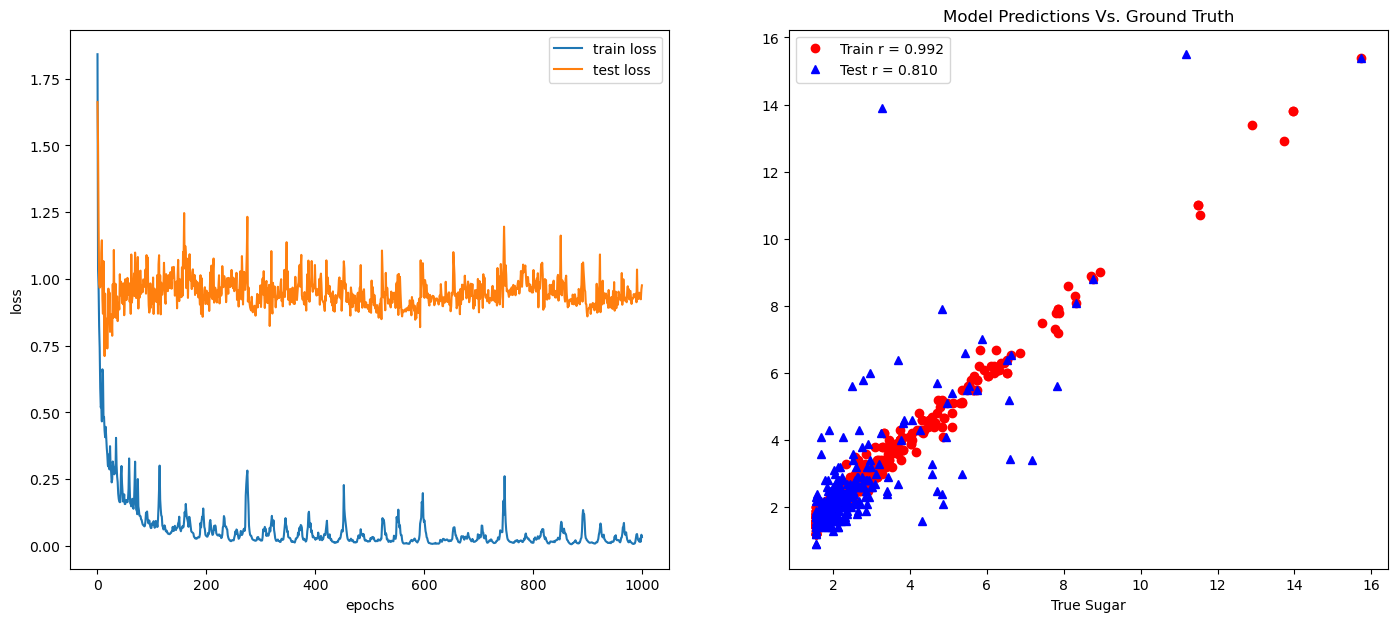

In [99]:
fig, ax = plt.subplots(1,2, figsize=(17,7))

ax[0].plot(trainLosses)
ax[0].plot(testLosses)
ax[0].legend(['train loss', 'test loss'])
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

yHatTrain = ANN(train_data_S)
yHatTest = ANN(test_data_S)

ax[1].plot(yHatTrain.detach(), train_labels_S, 'ro')
ax[1].plot(yHatTest.detach(), test_labels_S, 'b^')
ax[1].set_xlabel('Model-Predicted Sugar')
ax[1].set_xlabel('True Sugar')
ax[1].set_title('Model Predictions Vs. Ground Truth')

corrTrain = np.corrcoef(yHatTrain.detach().T, train_labels_S.T)[1,0]
corrTest = np.corrcoef(yHatTest.detach().T, test_labels_S.T)[1,0]
ax[1].legend([f'Train r = {corrTrain:.3f}', f'Test r = {corrTest:.3f}'])
plt.show()

In [96]:
yHatTrain.detach()

tensor([[2.2306],
        [1.9549],
        [5.6984],
        ...,
        [1.9707],
        [2.2467],
        [1.6199]])

In [46]:
cols2zscore

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [86]:
# actual values

actualFeatures = torch.tensor(originalData[cols2zscore].values[indexToReplace,:]).float()

actualValues = torch.tensor(originalData['residual sugar'][indexToReplace].values[:,None]).float()



In [112]:
# z-score actual values as well

originalAV = originalData[originalData.keys()].apply(stats.zscore)
zsOriginalAV = originalAV['residual sugar'].values

In [114]:
zsOriginalAV = zsOriginalAV[:,None]

In [118]:
zsOriginalAV = zsOriginalAV[indexToReplace,:]

In [121]:
zsOriginalAVT = torch.tensor(zsOriginalAV).float()

In [122]:
# run for the rows where the residual sugar value is NaN



yHat = ANN.forward(test_dataT)
loss = lossFunction(yHat, zsOriginalAVT)


In [125]:
yHat

tensor([[5.5205],
        [3.0495],
        [1.7049],
        [2.2592],
        [1.5593],
        [2.1527],
        [1.8477],
        [1.6548],
        [1.6147],
        [2.1264]], grad_fn=<AddmmBackward0>)

In [126]:
zsOriginalAVT

tensor([[-0.7370],
        [ 2.1718],
        [-0.0985],
        [ 0.6819],
        [-0.1694],
        [-0.5951],
        [ 0.1144],
        [-0.8080],
        [-0.3113],
        [-0.0985]])

In [90]:
# actual values

originalData['residual sugar'][indexToReplace].values

array([1.5, 5.6, 2.4, 3.5, 2.3, 1.7, 2.7, 1.4, 2.1, 2.4])

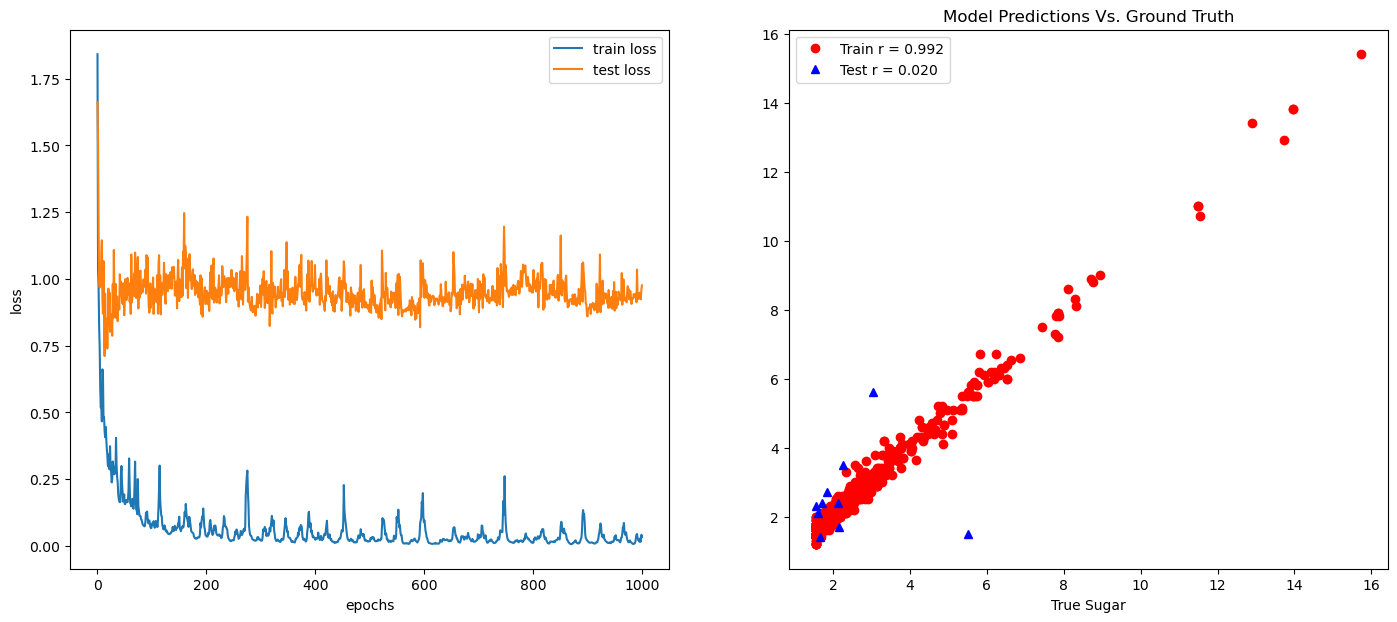

In [123]:
fig, ax = plt.subplots(1,2, figsize=(17,7))

ax[0].plot(trainLosses)
ax[0].plot(testLosses)
ax[0].legend(['train loss', 'test loss'])
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

yHatTrain = ANN(train_data_S)
# yHatTest = ANN(test_data_S)

ax[1].plot(yHatTrain.detach(), train_labels_S, 'ro')
ax[1].plot(yHat.detach(), actualValues, 'b^')
ax[1].set_xlabel('Model-Predicted Sugar')
ax[1].set_xlabel('True Sugar')
ax[1].set_title('Model Predictions Vs. Ground Truth')

corrTrain = np.corrcoef(yHatTrain.detach().T, train_labels_S.T)[1,0]
corrTest = np.corrcoef(yHat.detach().T, zsOriginalAVT.T)[1,0]
ax[1].legend([f'Train r = {corrTrain:.3f}', f'Test r = {corrTest:.3f}'])
plt.show()

In [93]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.597000e+03,1.597000e+03,1.597000e+03,1587.000000,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03
mean,3.559388e-17,1.245786e-16,1.779694e-17,2.531411,-1.423755e-16,8.898469e-18,-5.339081e-17,-8.361001e-14,3.025479e-16,8.898469e-17,-5.695020e-16,4.182280e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.397282,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.136087e+00,-2.280762e+00,-1.391823e+00,0.900000,-1.604575e+00,-1.422837e+00,-1.262581e+00,-3.546932e+00,-3.709380e+00,-1.937318e+00,-1.899221e+00,-3.266852e+00
25%,-7.006076e-01,-7.718255e-01,-9.286769e-01,1.900000,-3.721412e-01,-8.478700e-01,-7.596977e-01,-6.111392e-01,-6.587444e-01,-6.392206e-01,-8.653154e-01,-7.866225e-01
50%,-2.412541e-01,-4.530063e-02,-5.384522e-02,2.200000,-1.809014e-01,-1.770746e-01,-2.568145e-01,-6.216372e-04,-9.673073e-03,-2.261897e-01,-2.073755e-01,4.534922e-01
75%,5.051954e-01,6.253377e-01,7.695258e-01,2.600000,5.283609e-02,4.937208e-01,4.975104e-01,5.780428e-01,5.744912e-01,4.228588e-01,6.385471e-01,4.534922e-01
max,4.352281e+00,5.878672e+00,3.754246e+00,15.500000,1.112349e+01,5.380944e+00,3.734821e+00,3.683719e+00,4.533826e+00,7.916418e+00,4.210221e+00,2.933721e+00
